# Chapter 3-5 Comparison of Linear Regression with K-Nearest Neighbors

Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

In [17]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=1, color='r')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__


import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

*Non-parametric* methods do not explicitly assume a parametric form for f(X), and thereby provide an alternative and more flexible approach for performing regression.  Here we consider one of the simplest and best-known non-parametric methods, K-nearest neighbors regression (KNN regression).

### 1D linear case

In [18]:
# Synthetic data generator
n = 20
eps=1
test1d_lin = ML_Table().with_column('x', np.arange(0, 10, 10/n))
test1d_lin['Y'] = test1d_lin.apply(lambda x: 0.3 + 2.1*x, 'x') + eps*np.random.normal(size=n)
#test1d_lin.scatter('x')

knn RSS 3 9.59785363099
lin RSS 11.7598745767


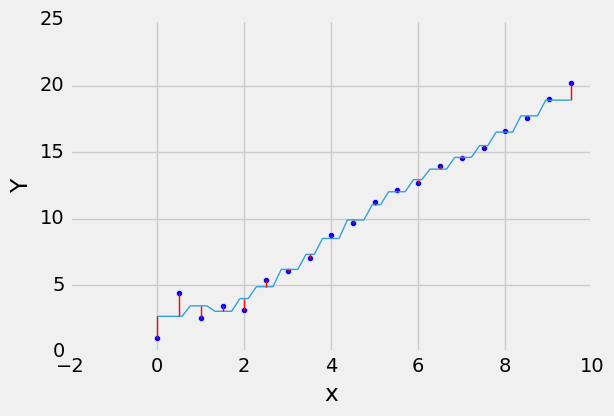

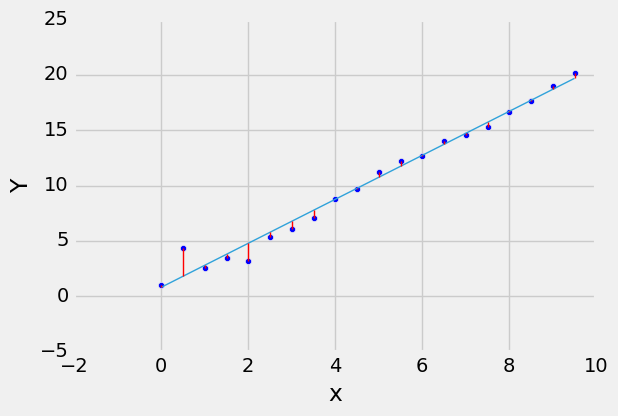

In [19]:
# Observe the behavior of knn regression for various n_neighbors
# note the stairstep between points
# increasing neighbors can introduce bias near discontinuities, i.e., ends
# but small k tracks the noise too heavily
k = 3
knn_mdl = test1d_lin.knn_regression('Y', n_neighbors=k)
ax = test1d_lin.plot_fit('Y', knn_mdl )
# note k=1 the perfect fit at the sample points in the absence of noise
print("knn RSS", k, test1d_lin.RSS_model('Y', knn_mdl))

# Compare with linear model on linear data
lin_mdl = test1d_lin.regression('Y')
ax = test1d_lin.plot_fit('Y', lin_mdl)
print("lin RSS", test1d_lin.RSS_model('Y', lin_mdl))

### Non-linear data

In [20]:
def sigmoid(x):
    return x/((1+x**2)**0.5)

In [21]:
nn = 20
neps = 0.1
test1d = ML_Table().with_column('x', (np.arange(nn)-nn/2)*5/nn)
test1d['Y'] = test1d.apply(lambda x: sigmoid(x), 'x') + neps*np.random.normal(size=nn)

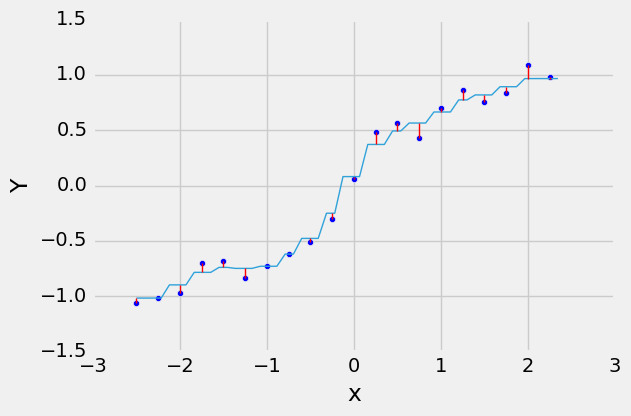

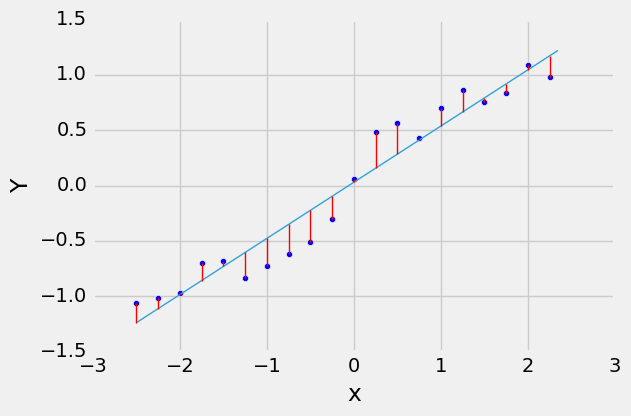

In [22]:
# knn tracks non-linearity
# note the error introduced near zero
# what happens with high k?
nk = 3
ax = test1d.plot_fit('Y', test1d.knn_regression('Y', n_neighbors=nk))
# Compare with linear model on non-linear data
ax = test1d.plot_fit('Y', test1d.regression('Y'))

## Multidimensional

In [23]:
n = 6
test_data = ML_Table(["x1", "x2"]).with_rows([(i,j) for i in range(n) for j in range(n)])
test_data['Y'] = test_data.apply(lambda x1, x2: x1+2*x2, ['x1', 'x2'])
test_data

x1,x2,Y
0,0,0
0,1,2
0,2,4
0,3,6
0,4,8
0,5,10
1,0,1
1,1,3
1,2,5
1,3,7


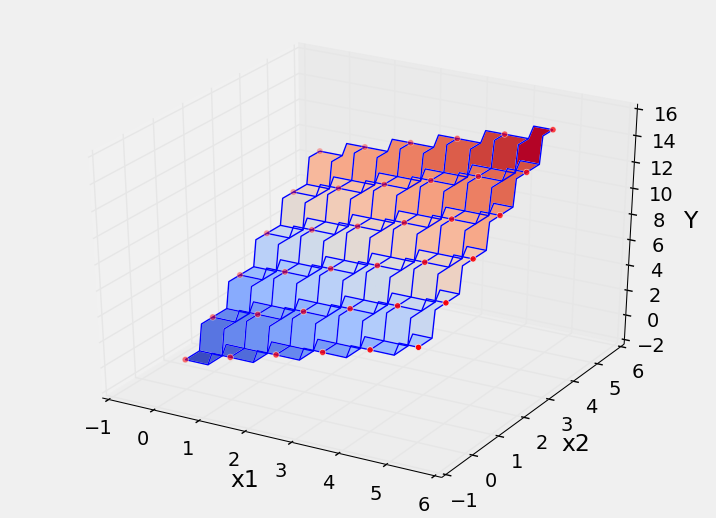

In [24]:
kmdl_1 = test_data.knn_regression('Y', n_neighbors=1)
ax = test_data.plot_fit('Y', kmdl_1, width=8, height=6)

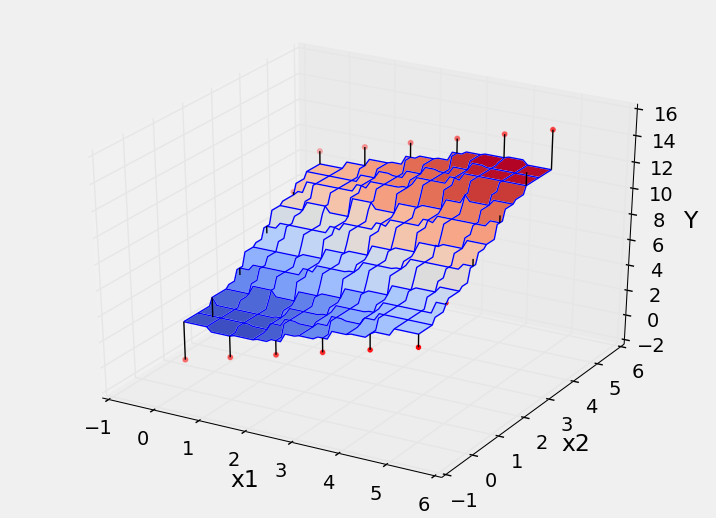

In [25]:
kmdl_9 = test_data.knn_regression('Y', n_neighbors=9)
ax = test_data.plot_fit('Y', kmdl_9, width=8, height=6)

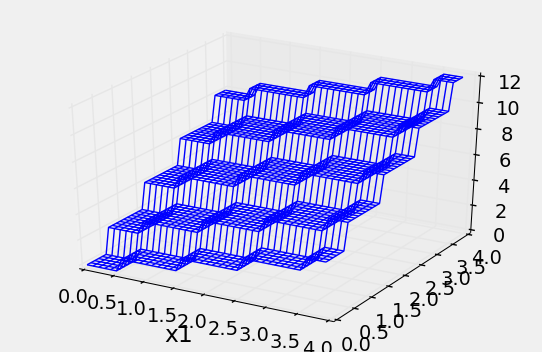

In [26]:
ML_Table._plot_wireframe(kmdl_1, 0, 4, 0, 4, n=40, x_label="x1")

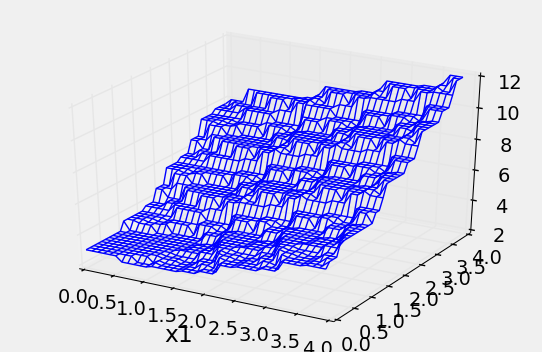

In [27]:
ML_Table._plot_wireframe(kmdl_9, 0, 4, 0, 4, n=40, x_label="x1")

In [28]:
def simdata2D(n, f, eps, low, high):
    s_tbl = ML_Table(["x", "y"]).with_rows([(i,j) for i in np.arange(low, high, (high-low)/n) for j in np.arange(low, high, (high-low)/n)])#
    s_tbl['z'] = s_tbl.apply(f, ['x', 'y']) + eps*(np.random.rand(n**2)-0.5)
    return s_tbl

In [29]:
def fun2(x, y):
    return sigmoid(x)*2 + sigmoid(y)*3

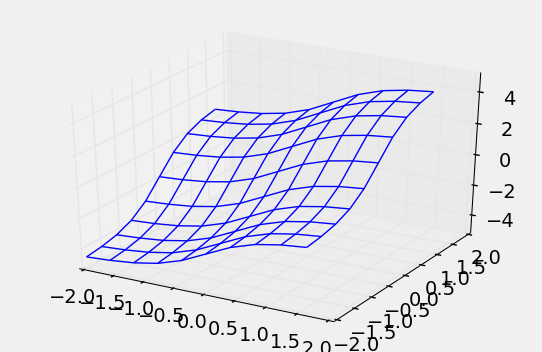

In [30]:
ML_Table._plot_wireframe(fun2, -2, 2, -2, 2, 10)

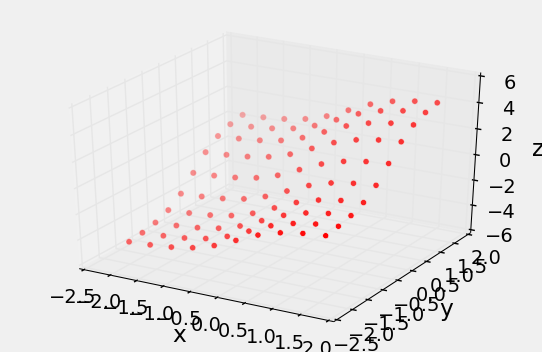

In [31]:
s2d = simdata2D(10, fun2, 0, -2, 2)
ax = s2d.plot_fit('z', None)

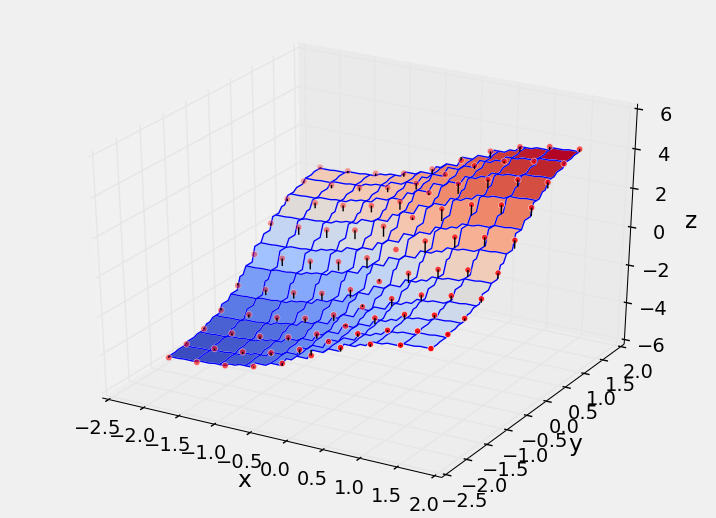

In [32]:
smdl = s2d.knn_regression('z', n_neighbors=3)
ax = s2d.plot_fit('z', smdl, width=8, height=6)